<h1>What is stixdcpy? </h1>
<p> stixdcpy allows you to query and download data which are available at <a href="https://pub023.cs.technik.fhnw.ch/">STIX data center</a>, include </p> 
<ul>
<li> Quick-look light curves </li>
<li> Housekeeping data </li>
<li> Science data </li>
<li> Energy calibration data </li>
<li> Auxilary data </li>
<li> STIX solar flare list  </li>
 </ul>
<p>It also provides modules for use to preview the data. 
Note that data downloaded with stixdcpy are not validated. They should not be used for publication purpose. 
If you need validated data, please visit  solar orbiter data archive or contact us. 
</p>



In [1]:

import sys
sys.path.append('/home/xiaohl/FHNW/STIX/gsw/sdcpy')
import numpy as np
import pandas as pd
from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT 
from stixdcpy import ancillary as anc
from stixdcpy.net import FitsQuery

from stixdcpy.science import L1 as L1Prod
from stixdcpy.science import Spectrogram as SpecProd
#Spectrogram
from stixdcpy.housekeeping import Housekeeping
from stixdcpy.net import JSONRequest as jreq

from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib notebook

# Request Quick-look  data from STIX data center 

<IPython.core.display.Javascript object>


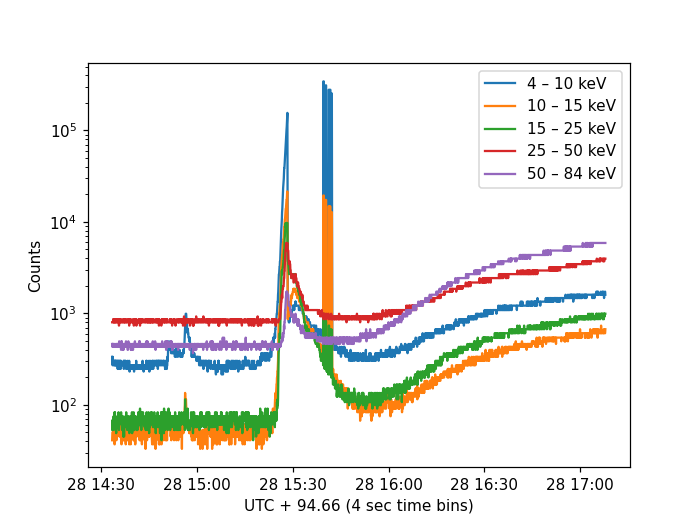

<AxesSubplot:xlabel='UTC + 94.66 (4 sec time bins)', ylabel='Counts'>

In [2]:

lc=LightCurves.fetch(start_utc='2021-10-28T15:00:00', end_utc='2021-10-28T17:00:00', ltc=True)
"""ltc:  boolean, optional
   True
     do light time correction if it is True, default value = False
"""
lc.peek()
#preview lightcurves


# Housekeep data

In [3]:
hk=Housekeeping.fetch('2021-02-14T05:00:00', '2021-02-14T07:00:00')
hk.param_names


{'NIX00020': 'SID',
 'NIXD0021': 'SW running',
 'NIXD0022': 'Instrument number',
 'NIXD0023': 'Instrument mode',
 'NIXD0025': 'HK_DPU_PCB_T',
 'NIXD0026': 'HK_DPU_FPGA_T',
 'NIXD0027': 'HK_DPU_3V3_C',
 'NIXD0028': 'HK_DPU_2V5_C',
 'NIXD0029': 'HK_DPU_1V5_C',
 'NIXD0030': 'HK_DPU_SPW_C',
 'NIXD0031': 'HK_DPU_SPW0_V',
 'NIXD0032': 'HK_DPU_SPW1_V',
 'NIXD0038': 'HK_ASP_REF_2V5A_V',
 'NIXD0039': 'HK_ASP_REF_2V5B_V',
 'NIXD0040': 'HK_ASP_TIM01_T',
 'NIXD0041': 'HK_ASP_TIM02_T',
 'NIXD0042': 'HK_ASP_TIM03_T',
 'NIXD0043': 'HK_ASP_TIM04_T',
 'NIXD0044': 'HK_ASP_TIM05_T',
 'NIXD0045': 'HK_ASP_TIM06_T',
 'NIXD0046': 'HK_ASP_TIM07_T',
 'NIXD0047': 'HK_ASP_TIM08_T',
 'NIXD0048': 'HK_ASP_VSENSA_V',
 'NIXD0049': 'HK_ASP_VSENSB_V',
 'NIXD0050': 'HK_ATT_V',
 'NIXD0051': 'HK_ATT_T',
 'NIXD0052': 'HK_HV_01_16_V',
 'NIXD0053': 'HK_HV_17_32_V',
 'NIXD0054': 'DET_Q1_T',
 'NIXD0055': 'DET_Q2_T',
 'NIXD0056': 'DET_Q3_T',
 'NIXD0057': 'DET_Q4_T',
 'NIXD0035': 'HK_DPU_1V5_V',
 'NIXD0036': 'HK_REF_2V5_V',
 'NI

<IPython.core.display.Javascript object>


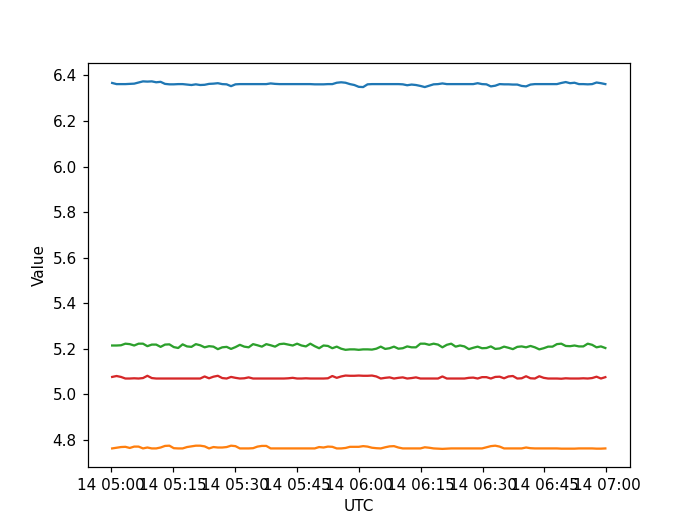

<AxesSubplot:xlabel='UTC', ylabel='Value'>

In [4]:

hk.plot('NIX00078,NIX00079,NIX00080,NIX00081')


# Calibration data

In [5]:
elut=EnergyLUT.request('2021-09-03T00:00:00')

In [6]:
#Print onboard elut and calibration run information
elut.info()
#elut.data


{'calibration_run': {'duration': 86400,
                     'obs_begin': '2021-09-02T12:56:17.958',
                     'run_id': 1353},
 'onboard_elut': {'upload_time_range': ['2021-06-25T14:54:14.456',
                                        '2021-06-25T14:55:49.456']}}


In [7]:
lut=elut.get_pixel_true_ebins(pixel=34)
#print the energy range of bins of pixel 34 
pd.DataFrame(lut)

,0,1
0,-0.100,3.911
1,3.911,4.914
2,4.914,5.917
3,5.917,6.919
4,6.919,7.922
5,7.922,8.925
6,8.925,9.928
7,9.928,10.930
8,10.930,11.933
9,11.933,12.936


# S/C Ephemeris 

<IPython.core.display.Javascript object>


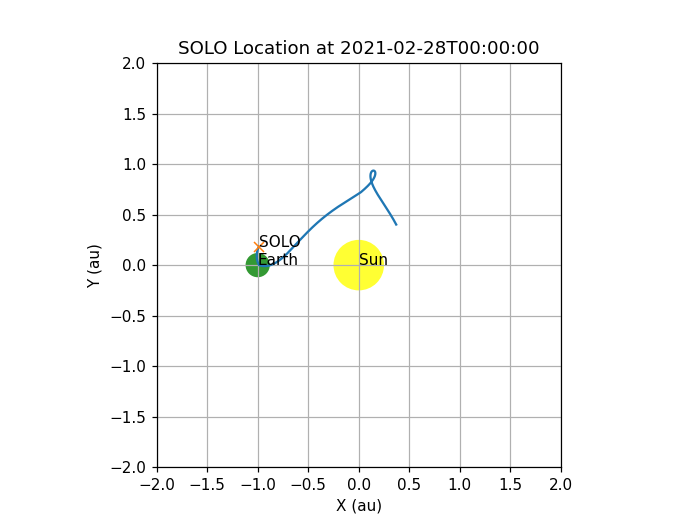

<AxesSubplot:title={'center':'SOLO Location at 2021-02-28T00:00:00'}, xlabel='X (au)', ylabel='Y (au)'>

In [8]:
emph=anc.Ephemeris.fetch(start_utc='2021-02-28T00:00:00', end_utc='2021-12-28T01:00:00')
emph.peek()

In [9]:
emph.to_pandas()

,ref_frame,observer,aunit,lunit,vunit,tunit,utc,x,y,z,sun_solo_r,earth_solo_r,speed,owlt,light_time_diff,earth_sun_solo_angle,sun_angular_diameter,elevation
0,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-02-28T00:00:00Z,0.370631,0.401611,0.033408,0.547516,1.419545,28.962680,708.359970,221.055510,132.604266,58.397308,-3.491687
1,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-02-28T12:01:17Z,0.366733,0.408932,0.032485,0.550249,1.417997,28.736242,707.587311,219.752499,131.796362,58.107335,-3.378690
2,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-03-01T00:02:34Z,0.362826,0.416173,0.031549,0.553026,1.416464,28.507150,706.822485,218.427622,131.001179,57.815536,-3.265022
3,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-03-01T12:03:52Z,0.358914,0.423332,0.030598,0.555846,1.414949,28.275599,706.066081,217.081780,130.218730,57.522197,-3.150795
4,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-03-02T00:05:09Z,0.354999,0.430410,0.029634,0.558708,1.413451,28.041799,705.318719,215.715957,129.449062,57.227614,-3.036121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-12-26T00:54:50Z,-0.993682,0.170970,-0.017786,1.008440,0.172194,10.731207,85.925407,-12.445880,9.814188,31.706424,1.010415
602,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-12-26T12:56:07Z,-0.992451,0.173805,-0.018068,1.007717,0.174971,10.727680,87.311538,-12.094141,9.985743,31.729183,1.027208
603,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-12-27T00:57:25Z,-0.991176,0.176619,-0.018350,1.006956,0.177737,10.723935,88.691786,-11.722979,10.156841,31.753161,1.043989
604,SOLO_HEE_NASA,Earth,deg,au,km/s,s,2021-12-27T12:58:42Z,-0.989857,0.179413,-0.018630,1.006157,0.180491,10.719983,90.065953,-11.332414,10.327445,31.778363,1.060756


In [10]:
#emph.data

# Science data

##  L1 data products

In [11]:
sci_data=L1Prod.fetch(request_id=2105090003)
#Bulk science data request ids (also called unique ids) can be found on the science data web page at STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2105090003_20210509T042711-20210509T044405_010270_V01.fits ...
Shifted time bins corrected


In [12]:
hdul=sci_data.hdul
hdul.info()


Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2105090003_20210509T042711-20210509T044405_010270_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     28   1R x 8C   ['J', 'J', 'J', '3B', '3B', 'D', 'K', '32B']   
  2  DATA          1 BinTableHDU     42   51R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


Shifted time bins corrected


<IPython.core.display.Javascript object>


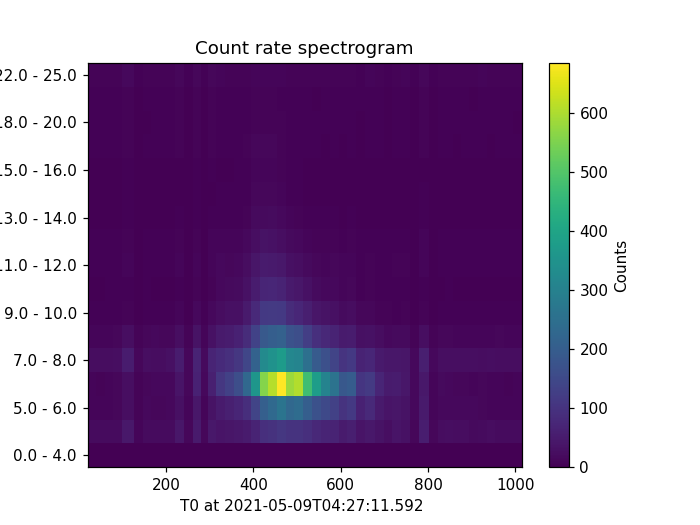

<IPython.core.display.Javascript object>


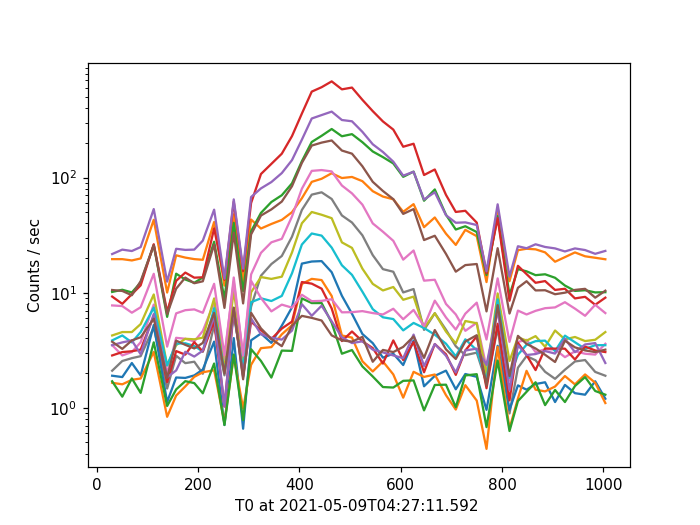

(<AxesSubplot:title={'center':'Count rate spectrogram'}, xlabel='T0 at 2021-05-09T04:27:11.592 ', ylabel='Energy range(keV'>,
 <AxesSubplot:xlabel='T0 at 2021-05-09T04:27:11.592 ', ylabel='Counts / sec'>,
 None,
 None)

In [13]:
sci_data.peek('spg,lc')
#science data quicklook

## Spectrogram products

In [14]:
request_id=	2108150003
l4d=SpecProd.fetch(request_id=request_id)
#fetch data from STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_012729_V01.fits ...
Shifted time bins corrected


Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_012729_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     41   1R x 12C   [J, J, J, 3B, 3B, D, J, 12B, 32B, I, K, 32B]   
  2  DATA          1 BinTableHDU     31   166R x 7C   ['D', 'D', 'K', 'D', '32D', '32D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


<IPython.core.display.Javascript object>


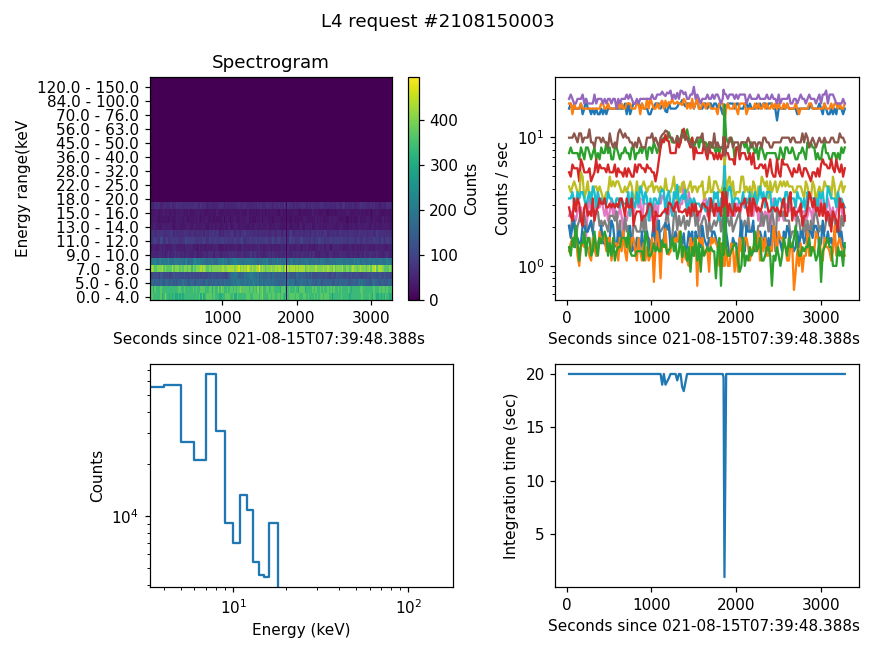

(<Figure size 800x600 with 5 Axes>,
 ((<AxesSubplot:title={'center':'Spectrogram'}, xlabel='Seconds since 021-08-15T07:39:48.388s ', ylabel='Energy range(keV'>,
   <AxesSubplot:xlabel='Seconds since 021-08-15T07:39:48.388s ', ylabel='Counts / sec'>),
  (<AxesSubplot:xlabel='Energy (keV)', ylabel='Counts'>,
   <AxesSubplot:xlabel='Seconds since 021-08-15T07:39:48.388s ', ylabel='Integration time (sec)'>)))

In [15]:
l4d.hdul.info()
l4d.peek()

# Data search and data download

In [16]:
res=FitsQuery.query(start_utc='2021-07-28T05:00:00', stop_utc='2021-07-29T07:00:00',product_type='lc')
#print(res)

In [17]:
res.to_pandas()

,url,observation_time_range,creation_time,fits_id
0,http://pub023.cs.technik.fhnw.ch/download/fits...,"[2021-07-28T00:00:00.299, 2021-07-28T17:49:08....",2021-09-07T15:05:14.129,11770
1,http://pub023.cs.technik.fhnw.ch/download/fits...,"[2021-07-29T00:00:00.443, 2021-07-29T11:13:08....",2021-09-07T15:05:19.471,11781
2,http://pub023.cs.technik.fhnw.ch/download/fits...,"[2021-07-28T17:49:08.408, 2021-07-29T00:00:00....",2021-09-07T15:05:19.472,11782


In [18]:
fits_list=res.fetch()

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-ql-lightcurve_20210728_011770_V01.fits ...
Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-ql-lightcurve_20210729_011781_V01.fits ...
Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-ql-lightcurve_20210728_011782_V01.fits ...


In [19]:
hduls=res.open_fits()


In [20]:
res.fits_info()

Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-ql-lightcurve_20210728_011770_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     41   28R x 11C   [J, J, D, K, 32B, 12B, 33B, 3B, 3B, K, K]   
  2  DATA          1 BinTableHDU     33   16037R x 8C   [K, D, D, K, D, K, 5D, 5D]   
  3  ENERGIES      1 BinTableHDU     19   5R x 3C   [K, D, D]   
None
Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-ql-lightcurve_20210729_011781_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     41   18R x 11C   [J, J, D, K, 32B, 12B, 33B, 3B, 3B, K, K]   
  2  DATA          1 BinTableHDU     33   10097R x 8C   [K, D, D, K, D, K, 5D, 5D]   
  3  ENERGIES      1 BinTableHDU     19   5R x 3C   [K, D, D]   
None
Filename: /home/xiaohl/FHNW/STIX/g

# Download flare list

In [21]:
flares=jreq.fetch_flare_list('2020-04-08T00:00:00',  '2021-12-09T00:00:00', sortedby='goes' )
#sort key can be LC0, LC1, LC2, LC3, LC4, time, goes

pd.DataFrame(flares)

{'error': "find_and_sort_flares() got an unexpected keyword argument 'num_limit'"}
find_and_sort_flares() got an unexpected keyword argument 'num_limit'


""
